In [1]:
#Packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_excel('KopKopi Competitor Analysis.xlsx')
data=data[['Keyword', 'Name', 'Producer', 'Channel', 'Link', 'PLN per 250gr',
       'IDR per 250gr', 'Region ', 'Quality', 'supplier assumed']]
print(f'Dataset Dimensions {data.shape}')

Dataset Dimensions (71, 10)


In [3]:
#Initial Missing Values
data.isnull().sum()

Keyword              4
Name                12
Producer            12
Channel             16
Link                10
PLN per 250gr       16
IDR per 250gr       17
Region              22
Quality             37
supplier assumed    54
dtype: int64

In [4]:
data['PLN per 250gr'][63]=0

data['PLN per 250gr']=pd.to_numeric(data['PLN per 250gr'])

In [5]:
data=data.dropna(axis=0,how='all')
#Percentage of Missing Values
data.isnull().mean()*100

Keyword              2.898551
Name                14.492754
Producer            14.492754
Channel             20.289855
Link                11.594203
PLN per 250gr       20.289855
IDR per 250gr       21.739130
Region              28.985507
Quality             50.724638
supplier assumed    75.362319
dtype: float64

In [6]:
try:
    for i in range(data.shape[0]):
        if data['Producer'][i]=='??':
            data['Producer'][i]='Astra'
            data['Channel'][i]='Astra'
except:
    pass


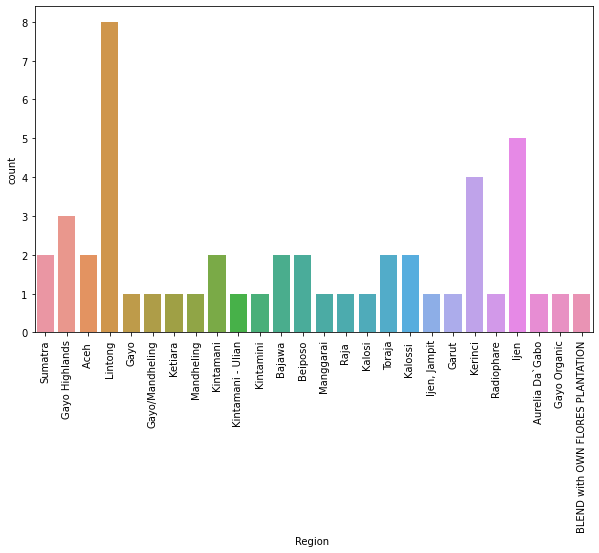

In [7]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(data['Region '])
plt.show()

In [8]:
numeric=data.select_dtypes(exclude='object').fillna(data.mean())

In [13]:
cat=data.select_dtypes(include='object').fillna(np.nan)

In [14]:
data_01=pd.concat([cat,numeric],axis=1)

<AxesSubplot:xlabel='IDR per 250gr', ylabel='Region '>

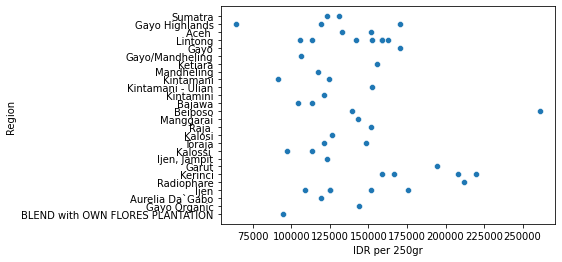

In [35]:
sns.scatterplot(data_01['IDR per 250gr'],data_01['Region '])

In [36]:
data_01.to_excel('data_cleaned.xlsx')